Praktikum Digitale Signalverarbeitung
=====================================

**Author:** Johann-Markus Batke

**Date:** <2024-05-03 Fr>



## Vorbereitung



Ziel dieses Versuchs ist es, ein beliebiges Signal mit Hilfe einer Raumimpulsantwort zu verhallen (aka Faltungshall). Die Wahl des Signals bzw. der Raumimpulsantwort ist beliebig, muss aber vor Durchführung des Praktikums erfolgen. 

1.  Beschaffen Sie sich eine oder mehrere Raumimpulsantworten als
    wav-Datei. Einige mögliche Beschaffungsquellen sind:
    -   [https://www.lieuxperdus.com/convolver/download/](https://www.lieuxperdus.com/convolver/download/)
    -   [http://isophonics.net/content/room-impulse-response-data-set](http://isophonics.net/content/room-impulse-response-data-set)
    -   [http://www.cksde.com/p_6_250.htm](http://www.cksde.com/p_6_250.htm)

2.  Beschaffen Sie einen geeigneten Stimulus wie Sprache oder Musik als
    wav-Datei. Sie können die Sprachdatei aus dem vergangenen
    Praktikumsversuchen verwenden.

3.  Wie lang ist das Faltungsergebnis, wenn die gefalteten Folgen die
    Längen $L = 17$ und $P = 9$ besitzen?

4.  Welche Ordnung $N$ für eine DFT ist mindestens zu wählen, damit die
    Berechnung der zyklischen Faltung durch Multiplikation im
    Frequenzbereich (also eine "Schnelle Faltung") der linearen Faltung
    entspricht? Geben Sie das Ergebnis mithilfe der Längen $L$ und $P$
    der gefalteten Folgen an!

5.  Es wird eine Schnelle Faltung mit $N=512$ Punkten berechnet. Die
    Längen der gefalteten Folgen sind $L = 400$ Punkte und $P=200$
    Punkte. Wieviele Punkte des Faltungsergebnisses entsprechen der
    linearen Faltung?



In [19]:
# libraries importieren
import numpy as np              
import matplotlib.pyplot as plt # zum Plotten von Graphen
import scipy.io.wavfile as wav  # zum Lesen von WAV-Dateien
import sounddevice as sd        # zum Abspielen von Audiodateien

# aufgabe 3
L = 17
P = 9

print("Faltungslaenge: ", L + P -1)
# Faltungslaenge:  25

#aufgabe 4
#da Faltungslänge 25 ist,  muss N >= 25 sein

# aufgabe 5 
L_1      = 400
P_1      = 200
N        = 512

falt     = L_1 + P_1 - 1    #599
punkt    = falt - N         #87
ergebnis = N - (punkt * 2)  #338

print("Ergebnis: ", ergebnis)

Faltungslaenge:  25
Ergebnis:  338


## Versuchsdurchführung



### Raumimpulsantwort



Die Raumimpulsantwort (RIA) ist charakteristisch für die akustischen Verhältnisse eines Raumes.

1.  Laden Sie die RIA aus der Wav-Datei in eine Variable,
    stellen Sie den Zeitverlauf dar. Beachten Sie die Abtastrate, mit
    der die Raumimpulsantwort gespeichert wurde.

2.  Normieren Sie die RIA auf den Maximalwert (d.h. der neue
    Maximalwert im Signal ist 1).

3.  Implementieren Sie die Wiedergabe des Signals unter Python. Hören
    Sie sich die RIA an und machen Sie sich einen Eindruck von den
    akustischen Verhältnissen in dem Raum, wo die Aufnahme erfolgte!
    Zur Wiedergabe des Signals in einem Notebook können Sie auf Ihre
    Kenntnisse aus Versuch PDS 1 zurückgreifen.



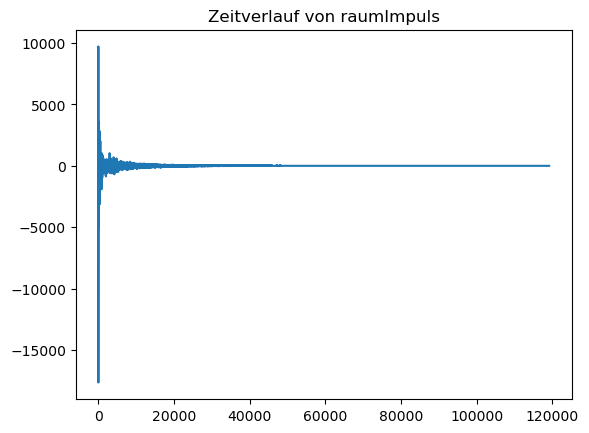

rate:  48000


In [20]:
# aufgabe 1 Laden Sie die RIA aus der Wav-Datei in eine Variable, stellen Sie den Zeitverlauf dar. Beachten Sie die Abtastrate, mit der die Raumimpulsantwort gespeichert wurde.
RIA = "./RIA1.wav"
# zeitverlauf von raumImpuls
rate, data = wav.read(RIA)  # rate = Abtastrate, data = Audiodaten

# plotte die Audiodaten
plt.plot(data)              
plt.title("Zeitverlauf von raumImpuls")
plt.show()             

# Ausgabe der Abtastrate
print("rate: ", rate)       

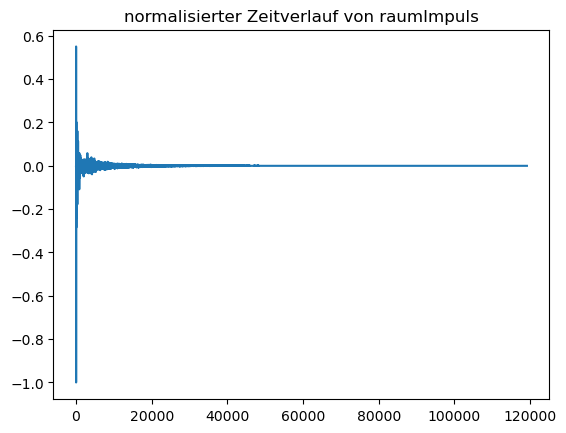

In [21]:
#Aufgabe 2 Normieren Sie die RIA auf den Maximalwert (d.h. der neue Maximalwert im Signal ist 1).
max_value = data.min()                  # maximaler Wert im Signal
normalized_data = (data / max_value) * -1      # Signal normieren

#normiertes Signal plotten
plt.plot(normalized_data )  
plt.title("normalisierter Zeitverlauf von raumImpuls")
plt.show()

In [22]:
# aufgabe 3 Implementieren Sie die Wiedergabe des Signals unter Python. Hören Sie sich die RIA an und machen Sie sich einen Eindruck von den akustischen Verhältnissen in dem Raum, wo die Aufnahme erfolgte!

# Signal abspielen
sd.play(normalized_data, rate)       

### Stimulus



Verfahren Sie genauso wie für die Raumimpulsantwort mit dem Stimulus, der verhallt werden soll.

Die Abtastrate von RIA und Stimulus müssen übereinstimmen. Ist dies nicht der Fall, können Sie mit Hilfe einer DAW (z.B. Audacity) oder unter Verwendung von Python die Abtastrate umsetzen. Für Python bietet das Modul Scipy den Befehl `scipy.signal.resample_poly` an. 



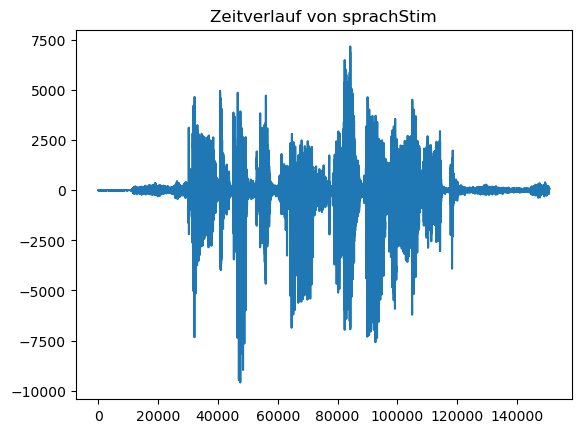

rate:  44100


In [23]:
# aufgabe 1 Laden Sie die sprachdatei aus der Wav-Datei in eine Variable, stellen Sie den Zeitverlauf dar. Beachten Sie die Abtastrate, mit der die sprachdatei gespeichert wurde.
sprachStim = "./digisig1.wav"

# zeitverlauf von sprachStim
rate_sp, data_sp = wav.read(sprachStim)

#plotte die Audiodaten
plt.plot(data_sp)
plt.title("Zeitverlauf von sprachStim")
plt.show()

#Ausgabe der Abtastrate
print("rate: ", rate_sp)



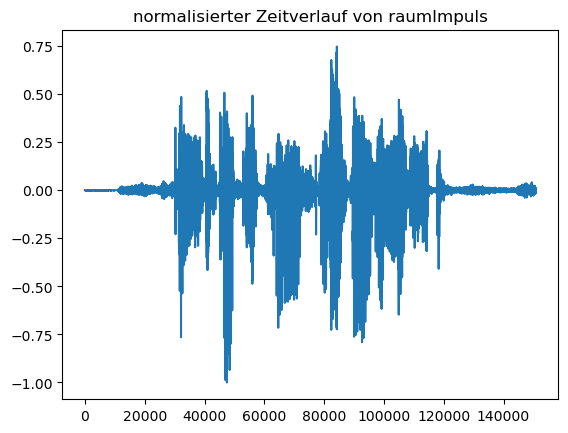

SprachStim normiert:  [-1.38914760e-20 -8.29356585e-06  2.52623710e-05 ...  6.36050507e-03
  1.15135403e-02  4.83584194e-03]


In [24]:
import scipy.signal as sig                      # Importieren des Moduls scipy.signal zum anpassen der Abtastrate
#aufgabe 2 Normieren Sie die SprachStim auf den Maximalwert (d.h. der neue Maximalwert im Signal ist 1).
max_value_sp = data_sp.min()                    # maximaler Wert im Signal
normalized_data_sp = (data_sp / max_value_sp)* -1      # Signal normieren

#plotten 
plt.plot(normalized_data_sp)        
plt.title("normalisierter Zeitverlauf von raumImpuls")
plt.show()


# die samplerate von sprachStim an die von raumImpuls anpassen
sprachStim = sig.resample_poly(normalized_data_sp, rate, rate_sp)

#print sprachstim normiert
print("SprachStim normiert: ", sprachStim)

In [25]:
# aufgabe 3 implementieren Sie die Wiedergabe des Signals unter Python. Hören Sie sich die SprachStim an und machen Sie sich einen Eindruck von den akustischen Verhälältnissen in dem Raum, wo die Aufnahme erfolgte!

# Signal abspielen
sd.play(normalized_data_sp, rate_sp)

### Faltung



Die Faltung kann mit Hilfe des Befehls `np.convole` durchgeführt werden. Achtung: es ist notwendig, dass die zu faltenden Signale vorab auf Eins normiert werden, da es sonst zu Verzerrungen kommt (Stand Python 3.10).

1.  Berechnen Sie vor dem Falten die Größe des Ausgangssignals und
    initialisieren Sie die Variable mit Nullen!

2.  Hören Sie sich das Signal an! Entsteht der erwartete Raumeindruck?

*Anmerkung:* Sofern Sie ein Stereopaar RIR zur Verfügung haben, können Sie das Eingangssignal getrennt für den linken und rechten Stereokanal falten. Die Faltung muss dann per Schleife mehrfach aufgerufen werden.



In [26]:
# Aufgabe 1 größe des ausgangssignals
len_data = len(normalized_data) + len(normalized_data_sp) -1                            # Laenge des Ausgangssignals
laenge   = np.zeros(len(normalized_data) + len(normalized_data_sp) -1)    # Ausgangssignal als Matrix initialisieren

#Ausgabe der Länge und der Matrix
print("Laenge: ", len_data)
print("Laenge: ", laenge)

print(normalized_data_sp)
print(normalized_data)


Laenge:  269936
Laenge:  [0. 0. 0. ... 0. 0. 0.]
[0.         0.         0.         ... 0.00604545 0.00771315 0.01094434]
[-9.64539007e-04  0.00000000e+00  1.13475177e-04 ...  1.13475177e-04
 -5.67375887e-05  0.00000000e+00]


Faltungssignal:  [ 9.43179691e-17 -1.34739956e-17  0.00000000e+00 ...  8.04285184e-07
 -6.20955473e-07  0.00000000e+00]


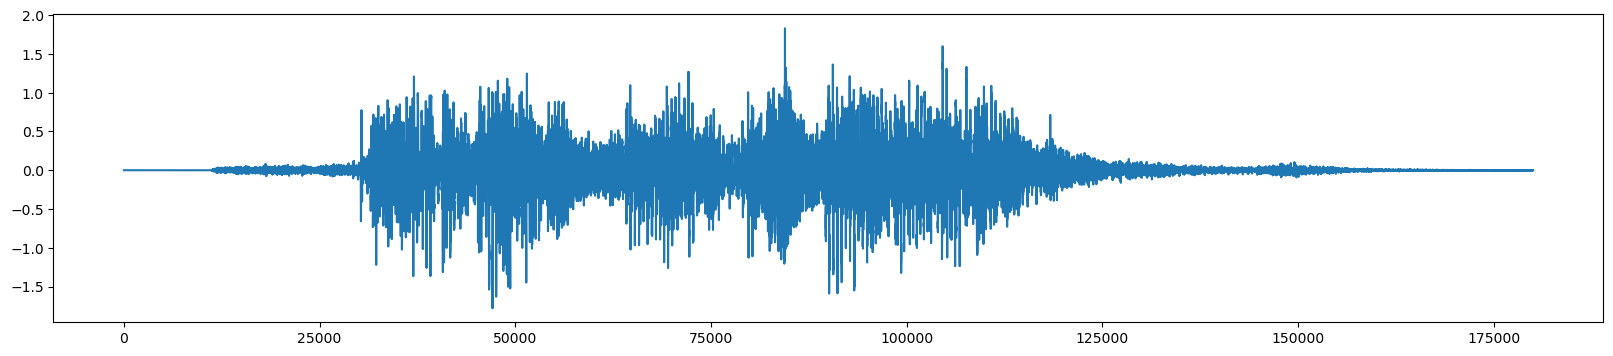

In [27]:

# faltung intialisieren
faltSignal = sig.fftconvolve(normalized_data, normalized_data_sp) # Faltung von raumImpuls und sprachStim
print("Faltungssignal: ", faltSignal)


# plotten
plt.figure(figsize=(20, 4))
plt.plot(faltSignal[:180000])

In [29]:
#Aufgabe 2 entsteht der erwartete Raumeindruck?

# Signal abspielen
sd.play(faltSignal, rate_sp)
